<a href="https://colab.research.google.com/github/akamitchu/Tensorflow_10daysofML/blob/master/10DaysOfML_TFugmum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mp
from google.colab import files
df = files.upload()


Saving time_series_2019-ncov-Confirmed.csv to time_series_2019-ncov-Confirmed.csv


In [0]:
import io

In [0]:
covid_df = pd.read_csv(io.StringIO(df['time_series_2019-ncov-Confirmed.csv'].decode('utf-8')))
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
!wget https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv

--2020-03-23 19:27:21--  https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3384 (3.3K) [text/plain]
Saving to: ‘Countries-Continents.csv’

Countries-Continent 100%[===================>]   3.30K  --.-KB/s    in 0s      

2020-03-23 19:27:21 (78.4 MB/s) - ‘Countries-Continents.csv’ saved [3384/3384]



In [15]:
continents = pd.read_csv('Countries-Continents.csv')
continents.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [0]:
regions = covid_df.shape[0]

for column in covid_df[covid_df.columns[4:]]:
    if (covid_df[column].isin([0]).sum() / regions) * 100 > 70:
        covid_df.drop(column,axis=1, inplace=True)

In [0]:
covid_df = pd.merge(right=covid_df, left=continents, right_on='Country/Region', left_on='Country')
dates = covid_df.columns[6:]
countries = covid_df['Country/Region'].unique()
cs = covid_df['Continent'].unique()

In [0]:
def get_cases_for_country(country):
    r =  covid_df.loc[covid_df['Country/Region'] == country].values.tolist()[0]
    return r[6:]

In [0]:
def get_cases_for_date(date):
    r = []
    for c in countries:
        r.append(covid_df.loc[covid_df['Country/Region'] == c][date].sum())
    return r

In [0]:
def get_cases_for_continent(date):
    r = []
    for c in cs:
        r.append(covid_df.loc[covid_df['Continent'] == c][date].sum())
    return r

In [0]:
def plot_continentwise_for_date(date):
    plt.clf()
    plt.grid(color='b', linestyle=':', linewidth=0.2, zorder=0)
    plt.bar(cs,get_cases_for_continent(date),zorder=3)
    plt.xticks(rotation=45)

In [0]:
def plot_countrywise_for_date(date):
    temp = get_cases_for_date(date)
    for i in range(10,len(countries),10):
        plt.clf()
        plt.grid(color='b', linestyle=':', linewidth=0.2, zorder=0)
        plt.bar(countries[i-10:i],temp[i-10:i], zorder=3)
        plt.xticks(rotation=45)

In [0]:
def plot_datewise_for_country(country):
    plt.close()
    plt.grid(color='b', linestyle=':', linewidth=0.2, zorder=0)
    plt.tick_params(axis='x', which='major', labelsize=5)
    plt.plot(dates,get_cases_for_country(country), zorder=3)
    plt.xticks(rotation=45)

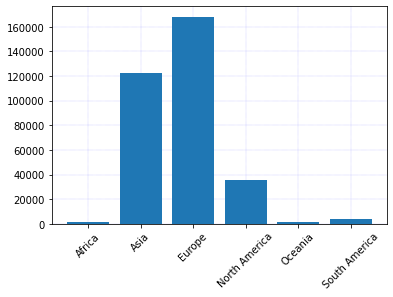

In [78]:
plot_continentwise_for_date('3/22/20')

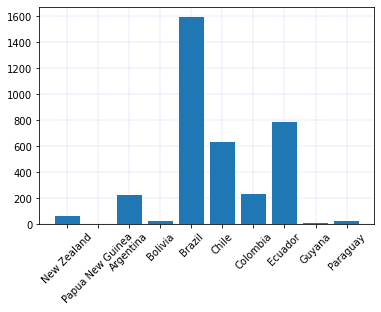

In [79]:
plot_countrywise_for_date('3/22/20')

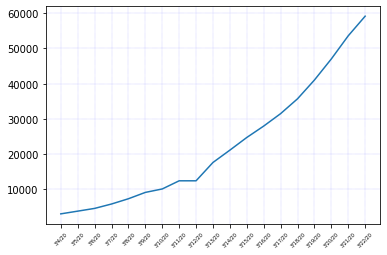

In [84]:
plot_datewise_for_country('Italy')